Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

Importing Raw data

In [2]:
data=pd.read_csv('C:/Users/Abhishek/Documents/Machine Learning A-Z New/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_startups.csv')

Splitting dependent and independent variables

In [3]:
y=data.iloc[:,-1].values
x=data.iloc[:,0:4].values

Encoding categorical independent variable

In [4]:
ct=ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

Splitting training and testing data and Fitting the model

In [5]:
#We will intentionally remove the first column in order to decrease redundancy created by the 
#one hot encoding of the categorical variable.
x=x[:,1:]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
linreg=LinearRegression()

In [8]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predicting the output and plotting predicted output with actual output (which should be close to x=y line)

In [9]:
y_pred=linreg.predict(x_test)

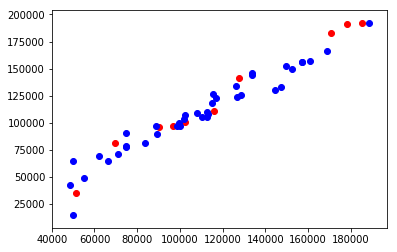

In [10]:
plt.scatter(y_pred,y_test,color='red')
plt.scatter(linreg.predict(x_train),y_train,color='blue')

Funtion to plot Learning curve from sklearn (https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [11]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Learning curve plot

<module 'matplotlib.pyplot' from 'C:\\Users\\Abhishek\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

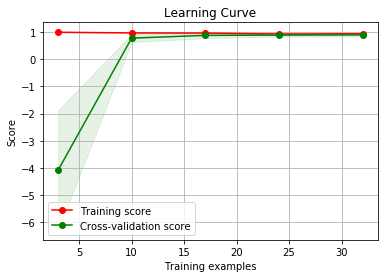

In [12]:
plot_learning_curve(linreg,'Learning Curve',x_train,y_train,cv=5)

If you want to perform backward elimination as well then we can use the following code.
(Backward elimination is method of building an efficient model which kicks out the features with high p-value, which means they don't take part in training and only the most relevant features are used to train the model as per your chosen Significance level)

In [13]:
import statsmodels.formula.api as sm

x=np.append(arr=np.ones((50,1),dtype='int64'),values=x,axis=1)

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(endog=y,exog=x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    print('new shape after backward elimination :',x.shape)
    return x
 
SL = 0.05
X_opt = x[:, [0, 1, 2, 3, 4, 5]]
X_opt=np.array(X_opt).astype(float)
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           3.50e-32
Time:                        11:41:40   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

We can clearly see that Using backward elimination gave us quite better results and it removed a lot of extra features that were not helpful in training our model, and the output seems to follow x=y even more closely

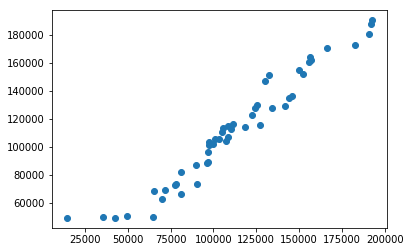

In [14]:
l=LinearRegression()
l.fit(X_Modeled,y)
plt.scatter(y,l.predict(X_Modeled))